In [29]:
## PYTHON LIBRARIES
# Importing libraries
import sys
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm, tqdm_notebook
#import missingno as msno
import matplotlib.gridspec
from scipy import stats
import matplotlib.patches as mpatches
# Define some general functions
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from adjustText import adjust_text
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import datetime
import statsmodels
import scikit_posthocs as sp
from scipy import stats

## WORKING DIRECTORY
path = "../analysis/plots/"
new_day = datetime.datetime.now().strftime("%Y%m%d")

palette = {"Continuous": "darkviolet", "Intermittent" : "lime", "Control":"black"}

In [30]:
dfmales = pd.read_csv("../analysis/df_males.csv")
dfmales.set_index("Unnamed: 0", inplace = True)
dffemales = pd.read_csv("../analysis/df_females.csv")
dffemales.set_index("Unnamed: 0", inplace = True)
metadatamales = pd.read_csv("../analysis/metadata_males.csv")
metadatamales.set_index("ID", inplace = True)
metadatafemales = pd.read_csv("../analysis/metadata_females.csv")
metadatafemales.set_index("ID", inplace = True)

In [31]:
mer_males = pd.merge(dfmales, metadatamales.loc[:, ["Treatment"]], 
                     left_index = True, right_index = True)
mer_females = pd.merge(dffemales, metadatafemales.loc[:, ["Treatment"]], 
                     left_index = True, right_index = True)

stats_males = pd.read_csv("../analysis/stats_males_maarouf.csv", sep = ",")
stats_males.set_index("Unnamed: 0", inplace = True)
stats_females = pd.read_csv("../analysis/stats_females_maarouf.csv", sep = ",")
stats_females.set_index("Unnamed: 0", inplace = True)

In [32]:
imgenes = ["Ahr","Casp3","Ccl2","Ccl20","Ccl3","Ccl5","Csf2","Cxcl1","Cxcl9","Cyr61","Dll1","Eda2r","Epo","Erbb4","Fas"
,"Fstl3","Gcg","Ghrl","Il10","Il17a","Il17f","Il1a","Il1b","Il23r","Il5","Il6","Itgb6","Kitlg","Lgmn","Map2k6"
,"Parp1","Pla2g4a","Plin1","Prdx5","S100a4","Tgfb1","Tgfbr3","Tnf","Tnfrsf11b","Tnfrsf12a","Tnfsf12","Yes1", "Treatment"]
len(imgenes)

43

In [33]:
mer_males['Treatment'] = mer_males['Treatment'].astype(str) + "_Males"
mer_females['Treatment'] = mer_females['Treatment'].astype(str) + "Females"
mer = pd.concat([mer_males, mer_females], axis = 0)

In [34]:
merim = mer.loc[:, imgenes]

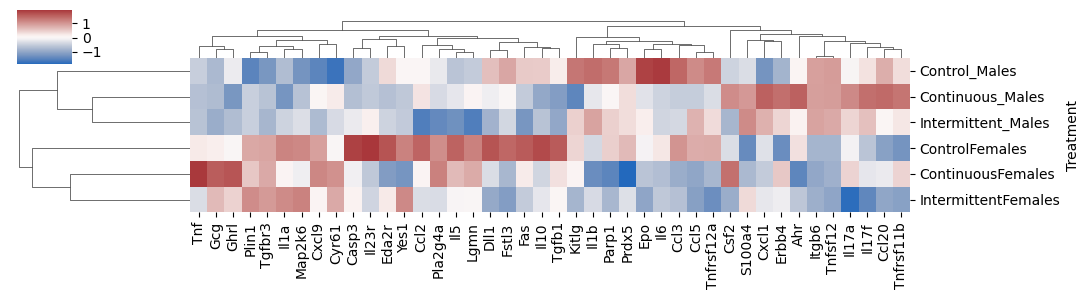

In [40]:
cm = sns.clustermap(merim.groupby("Treatment").median(), figsize = (11, 3), z_score = 1,
                   cmap = "vlag", row_cluster=True)
matplotlib.rcParams['pdf.fonttype'] = 42
plt.savefig("{}/MB_immgenes_MaleFemale_{}.pdf".format(path, new_day))

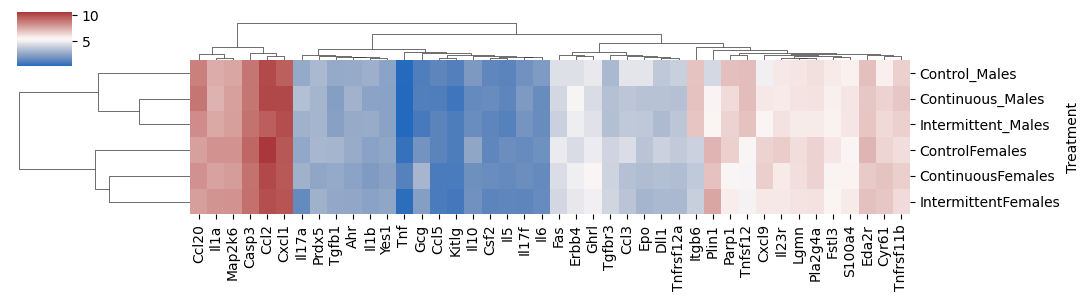

In [43]:
cm = sns.clustermap(merim.groupby("Treatment").median(), figsize = (11, 3),
                   cmap = "vlag", row_cluster=True, z_score = None)
matplotlib.rcParams['pdf.fonttype'] = 42
plt.savefig("{}/MB_immgenes_MaleFemale_log2_{}.pdf".format(path, new_day))

In [55]:
caca = mer.loc[:, ["Tnf", "Treatment"]].dropna()

(caca[caca["Treatment"] == "ControlFemales"].mean())/(caca[caca["Treatment"] == "Control_Males"].mean())

/var/folders/1d/m_275l6153b26smzn9vx6txh0000gp/T/ipykernel_23773/4102307526.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (caca[caca["Treatment"] == "ControlFemales"].mean())/(caca[caca["Treatment"] == "Control_Males"].mean())


Tnf    3.422952
dtype: float64

In [45]:
caca

,Gcg,Treatment
TNES-AE41,3.69864,Continuous_Males
TNES-AE82,0.15020,Continuous_Males
TNES-AE83,1.40529,Continuous_Males
TNES-AC55,1.24611,Continuous_Males
TNES-AC56,0.57505,Continuous_Males
...,...,...
TNES-Y790,2.51451,ControlFemales
TNES-Y659,1.45072,ControlFemales
TNES-X716,0.94463,ControlFemales
TNES-AI04,1.71499,ControlFemales
